In [75]:
import numpy as np # numpy import 함. 
import matplotlib.pyplot as plt # 각각 함수 만들고, 시각화 하기 위해 matplotlib import
from scipy.optimize import minimize

ZeroDivisionError: division by zero

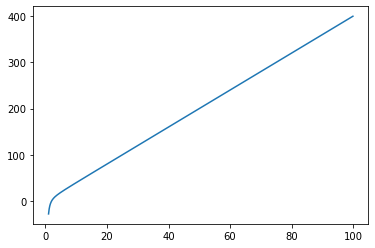

In [79]:
x = np.arange(1, 100, 0.1)
plt.plot(x, rice_bowl_function(x))
plt.scatter(0, rice_bowl_function(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("global")
plt.show()

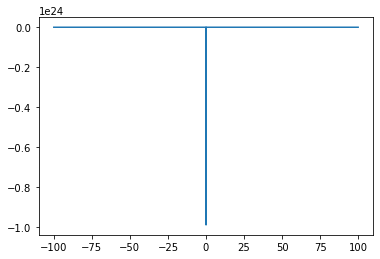

In [93]:
def f_global(x):
    """비선형 목적함수"""
    return (4*x - ( 32 / x**2))

x = np.arange(-100, 100, 0.1)
plt.plot(x, f_global(x))
plt.show()

In [96]:
x = 2
y = 4*x - ( 32 / x**2)
print(y)

0.0


In [55]:
x1 = np.linspace(0, 100, 100)
x2 = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x1, x2)
Z = rice_bowl_function(X, Y)

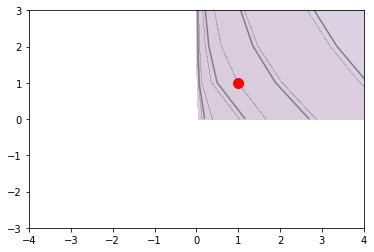

In [60]:
levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))

plt.show()


In [220]:
def numerical_diff(f, x): 
    h = 1e-5 # 0.00001 
    #return ( f(x + h) - f(x - h) ) / (2 * h)   # Symmetric derivative 
    return (f(x + h) - f(x)) / h                # Derivative 

In [221]:
def rice_bowl_function(x): 
    return 2*(x[0]**2) + 4*x[0]*x[1] # objective function(목적함수)
    # return None

In [222]:
# def rice_bowl_function_wrt_x0(x0): 
#     x1 = 4 
#     return 2*x[0]**2 + 4*x[0]*x[1]

In [223]:
# 밑바닥부터 시작하는 딥러닝 p.127 
def numerical_gradient_of_scalar_function_wrt_vector_x(f, x): 
    h = 1e-4 # 0.0001 
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 
    
    # The partial differential of function f with respect to x_idx 
    for idx in range(x.size): 
        tmp_val = x[idx] 

        # f(x+h)
        x[idx] = tmp_val + h
        f_x_plus_h = f(x)
        
        # f(x) 
        x[idx] = tmp_val
        fx = f(x)
        
        
        grad[idx] = (f_x_plus_h - fx) / h 
        
        #x[idx] = tmp_val 
    
    return grad

In [224]:
# 밑바닥부터 시작하는 딥러닝 p.128
numerical_gradient_of_scalar_function_wrt_vector_x(rice_bowl_function, np.array([1.0, 1.0]))

array([8.0002, 4.    ])

In [225]:
numerical_gradient_of_scalar_function_wrt_vector_x(rice_bowl_function, np.array([2.0, 2.0]))

array([16.0002,  8.    ])

In [226]:
numerical_gradient_of_scalar_function_wrt_vector_x(rice_bowl_function, np.array([3.0, 0.0]))

array([12.0002, 12.    ])

In [239]:
def numerical_gradient(f, X): 
    def numerical_gradient_of_scalar_function_wrt_vector_x(f, x): 
        h = 1e-4 # 0.0001 
        grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 
        
        # The partial differential of function f with respect to x_idx 
        for idx in range(x.size): 
            tmp_val = x[idx] 

            # f(x+h)
            x[idx] = tmp_val + h 
            f_x_plus_h = f(x)
            
            # f(x) 
            x[idx] = tmp_val 
            fx = f(x) 
            
            grad[idx] = (f_x_plus_h - fx) / h 
            
            #x[idx] = tmp_val 
        
        return grad
    
    if X.ndim == 1:
        return numerical_gradient_of_scalar_function_wrt_vector_x(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_of_scalar_function_wrt_vector_x(f, x)
        
        return grad 

In [240]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.21 ~ 31  
# [Day2]_Gradient Descent and Searching Space Topology.pdf p.35 
# 밑바닥부터 시작하는 딥러닝 p.131
def gradient_descent(f, x_0, eta=0.001, max_iter=10000): 
    x_k = x_0 
    
    for k in range(max_iter): 
        g_k = numerical_gradient(f, x_k)
        partial_x_k = -g_k
        x_k_plus_1 = x_k + eta * partial_x_k
        

        x_k = x_k_plus_1
        
        
    return x_k # 최적화 값.

In [241]:
def rice_bowl_function(x): 
    return 2*(x[0]**2) + 4*x[0]*x[1] #  Objective function

In [242]:
x_0 = np.array([1.0, 1.0]) # 초기값, 시작점

In [243]:
gradient_descent(rice_bowl_function, x_0=x_0, eta=0.001, max_iter=10000) # eta는 아주 작은 값은 상수로 고정한다.

array([-9.02167713e+09,  1.45790364e+10])

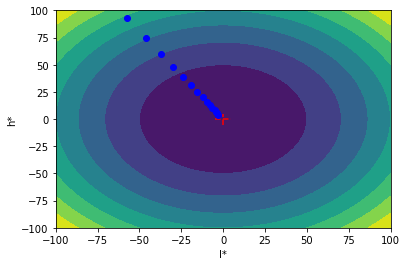

In [279]:
eta = 0.1
max_iter = 100000

def _gradient_descent(f, x_0, eta=0.0001, max_iter=10000):
    x = x_0
    x_history = []

    for k in range(max_iter):
        x_history.append( x.copy() )

        g = numerical_gradient(f, x) 
        x = x - eta * g 

    return x, np.array(x_history)

def rice_bowl_function(x): 
    return 2*(x[0]**2) + 4*x[0]*x[1] #  Objective function

x_0 = np.array([-3.0, 4.0])    

x, x_history = _gradient_descent(rice_bowl_function, x_0, eta=eta, max_iter=max_iter)

plt.plot( [-5, 5], [0,0], '--r')
plt.plot( [0,0], [-5, 5], '--r')
plt.plot(x_history[:,0], x_history[:,1], 'bo')

# https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/
feature_x = np.linspace(-100, 100, 70) 
feature_y = np.linspace(-100, 100, 70) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
Z = X ** 2 + Y ** 2
  
# plots filled contour plot 
plt.contourf(X, Y, Z) 

plt.xlim(-100, 100)
plt.ylim(-100, 100)
# plt.xlim(-3.5, 3.5)
# plt.ylim(-4.5, 4.5)
plt.xlabel("l*")
plt.ylabel("h*")
plt.show()